# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option("display.max_rows",100)

# Read Data

In [2]:
df = pd.read_csv("./desktop/sad/bank.csv",delimiter = ";")

# Understanding The Data

### Shape

In [5]:
print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Dataset has 17 columns and 4521 rows


### Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


- there's no missing data which is good, And there's no issues in dtypes

In [4]:
# Renaming some features for conveinince
df = df.rename({"marital":"marital_status","default":"credit_default","contact":"contact_type","y":"subscribed"},axis=1)

### Looking at the data

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Column Rename 

In [9]:
df = df.rename({"marital":"marital_status","default":"credit_default","contact":"contact_type","y":"subscribed"},axis=1)

# Exploratory Data Analysis

In [11]:
# Data Sample
df.sample(10)

,age,job,marital_status,education,credit_default,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1869,44,management,married,tertiary,no,773,no,yes,cellular,9,jul,618,1,-1,0,unknown,no
1603,32,technician,married,unknown,no,14533,no,no,cellular,31,dec,646,3,198,2,success,no
2981,44,blue-collar,divorced,secondary,no,221,no,no,cellular,30,jul,149,13,-1,0,unknown,no
4166,42,technician,single,unknown,no,344,yes,no,unknown,3,jun,26,7,-1,0,unknown,no
3701,51,management,married,tertiary,no,5108,yes,no,cellular,8,oct,272,1,102,8,other,no
4422,37,services,divorced,primary,no,260,yes,no,cellular,17,apr,446,2,-1,0,unknown,no
1264,54,unemployed,married,primary,no,541,yes,no,cellular,3,feb,237,3,-1,0,unknown,no
2259,41,management,married,tertiary,no,326,yes,no,cellular,5,may,788,1,-1,0,unknown,yes
3010,29,technician,single,tertiary,no,0,yes,no,unknown,7,may,104,2,-1,0,unknown,no
1492,34,technician,married,tertiary,no,5060,yes,no,cellular,21,aug,12,21,-1,0,unknown,no


### Missing Values

<AxesSubplot:>

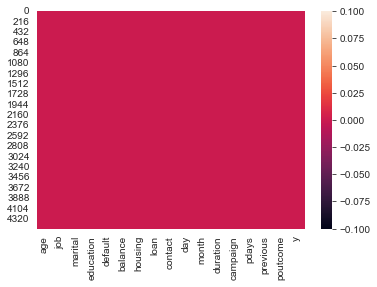

In [5]:
sns.heatmap(df.isnull())

#### Ther's no missing values.

# Descriptive Statistics

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


- The average age is 41
- there's a wrong values in balance column
- avg balance is 1400
- average call duration is 260 seconds
- maximum call duration was around 50 mins
- there's a negative values in balance feature which needs to be investigated
- maximum number of phone calls was 3

In [6]:
# Including Categorical Features
df.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


- there are 12 job types, the managment takes the most of them
- Over 50% of the customers are married which means that the campaign targets families.
- most of the customers reached secondary school education
- Most of the customers don't have credit 
- most of the customers have housing loan 
- most of the customers don't have personal loan 
- most of the previous marketing campaign result is unknown, which may mean that the campaign was made by another team, or something of that kind.
- most calls was made in may
- based on th subscribed feature, the campaign wasn't successful.

## Visualizing Distributions

<Figure size 1152x288 with 0 Axes>

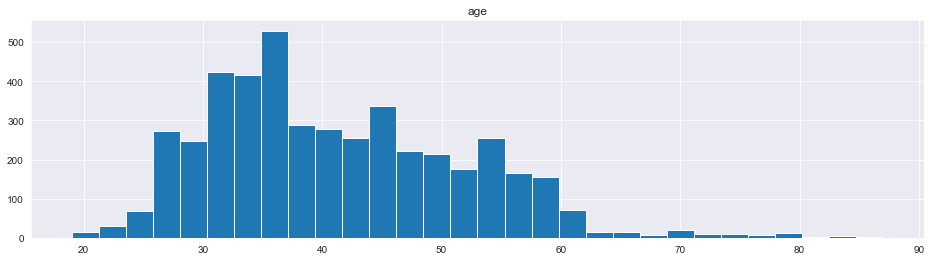

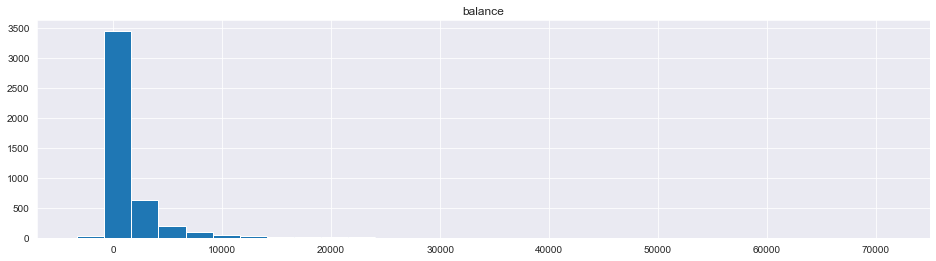

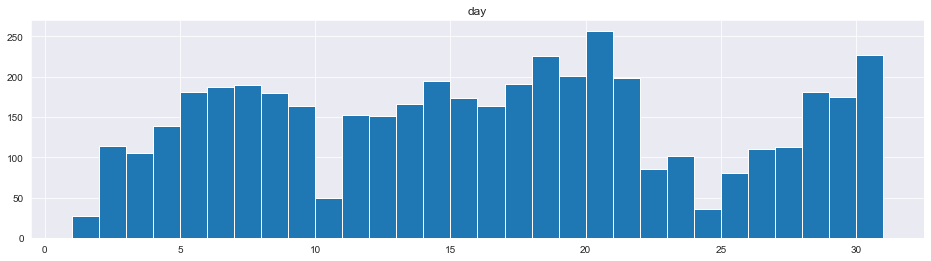

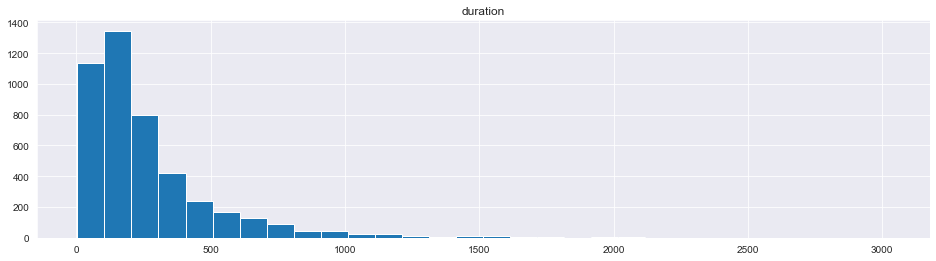

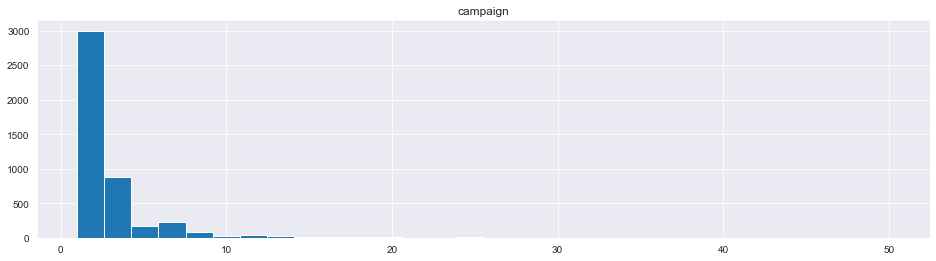

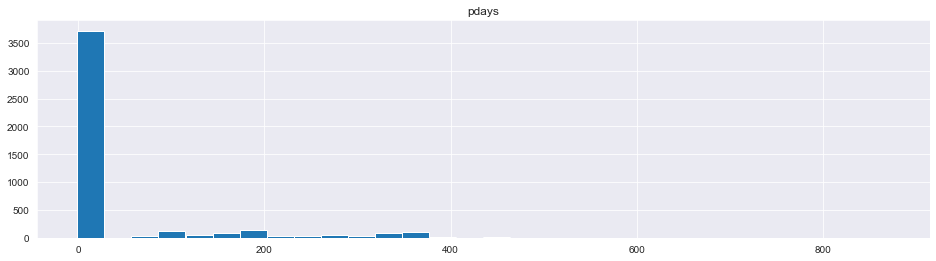

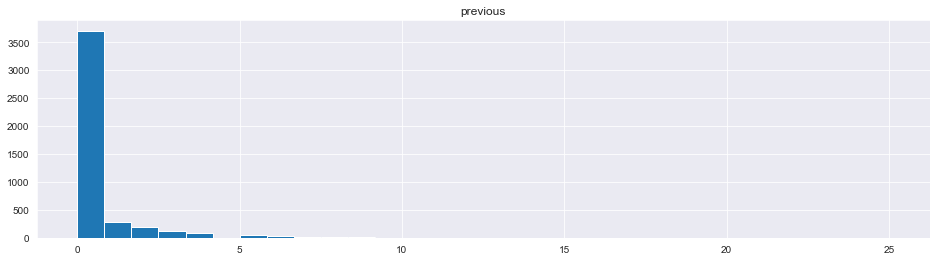

In [7]:
# Adjust Figure size
plt.figure(figsize=(16,4))
# Iterating throw numerical features
for feature in df.columns:
    if df[feature].dtype == "O":
        pass
    else:
        plt.figure(figsize=(16,4))
        # Plotting Histograms
        df[feature].hist(bins=30)
        plt.title(feature)
        plt.show()

- the campaign targets some elderlies 
- most of  the customers has less than 10000 balance
- most calls was made in day 21
- calls durations were between 0 and 500 seconds, however, there's calls were more than that, which needs to be investigated later
- each customer in this campaign was called from 1 to 5 times or even more
- previous calls was between 0 and 4 calls

## Categorical Features

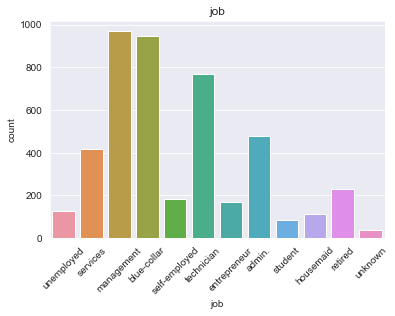

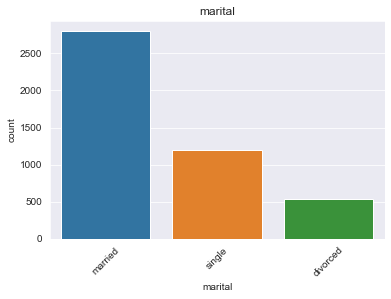

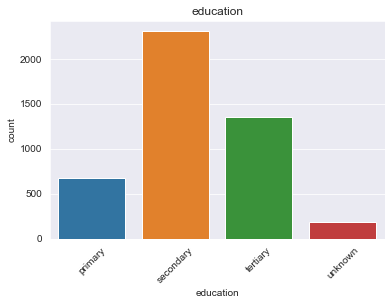

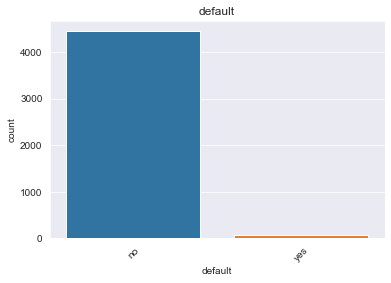

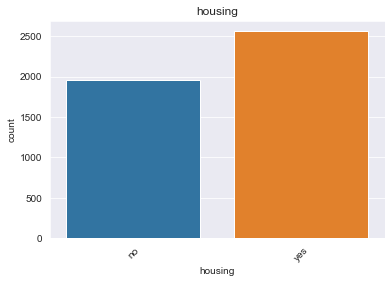

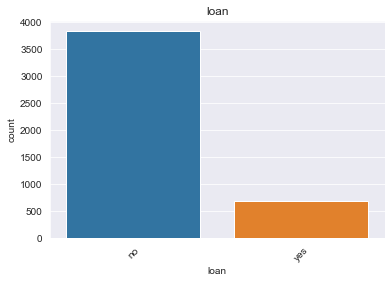

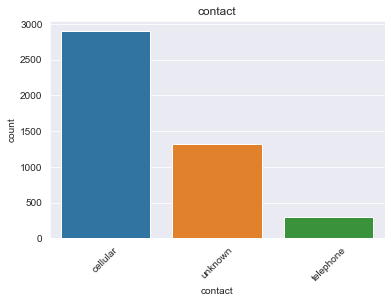

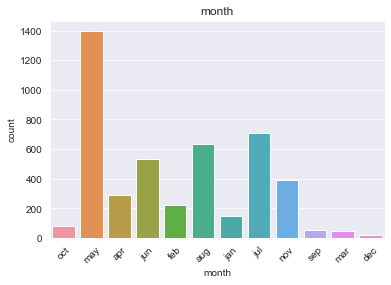

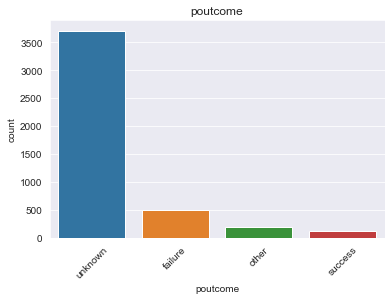

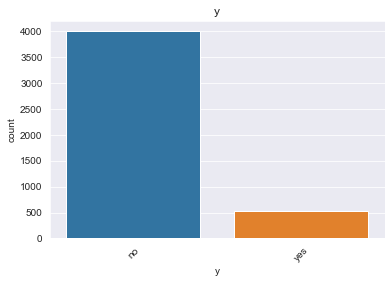

In [8]:
# For categorical variables, count plots is the best approach
for feature in df.columns:
    if df[feature].dtypes == "O":
        plt.xticks(rotation=45)
        sns.countplot(data=df,x=feature)
        plt.title(feature)
        plt.show()

- most of customers are in managment domain
- most of the customers are married

# Correlations

In [9]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


## Numerical Features

<AxesSubplot:>

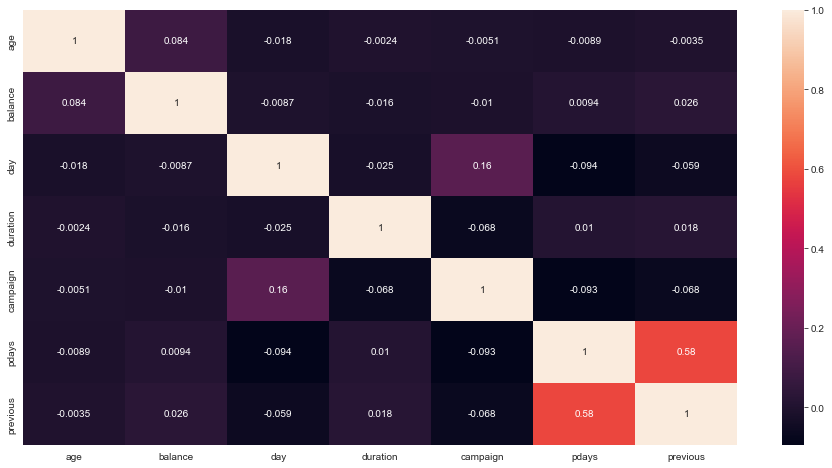

In [10]:
# Plotting heatmap for correlation metrics
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

- There's no strong correlation between features

## Categorical Features

- To check correlations between categorical features, We use chi-square test of independence


### Job vs subscribtion likliehood

In [15]:
# Frequency table
contingency_table = pd.crosstab(df.job,df.subscribed,margins=True)
# Import chi2_contingency
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"P-Value is :{p}")

P-Value is :3.108281116706568e-06


- Since P-value is more the 0.05, this means that there's no correlation between job type and subsicribtion likliehood

## Contact_type vs subsicribtion likliehood

In [16]:
contingency_table_2 = pd.crosstab(df.contact_type,df.subscribed,margins=True)
chi2, p, dof, ex = chi2_contingency(contingency_table_2)
print(f"P-Value is :{p}")

P-Value is :8.387957901356371e-17


- Since P-value is more the 0.05, this means that there's no correlation between contact type and subsicribtion likliehood

In [18]:
# Housing Loan vs Subsicribtion likelihood
contingency_table_3 = pd.crosstab(df.housing,df.subscribed,margins=True)
chi2, p, dof, ex = chi2_contingency(contingency_table_3)
print(f"P-Value is :{p}")

P-Value is :4.4960079648837684e-10


- Since P-value is more the 0.05, this means that there's no correlation between housing loan and subsicribtion likeliehood

## Personal loan vs subsicribtion likelihoodm

In [19]:
contingency_table_4 = pd.crosstab(df.loan,df.subscribed,margins=True)
chi2, p, dof, ex = chi2_contingency(contingency_table_4)
print(f"P-Value is :{p}")


P-Value is :0.00016070895847293198


- Since P-value is less than 0.05, this means that there's a correlation between personal loan and subsicribtion likeliehood

# Catgorical Vs Numerical Correlations

## Age vs Balance

Text(0.5, 1.0, 'Age Vs Balance')

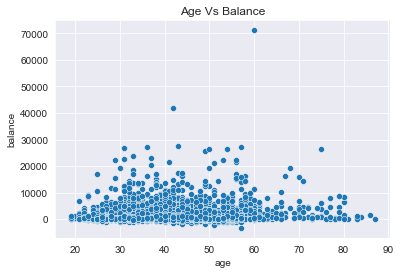

In [20]:
# Plotting Sctterplot
sns.scatterplot(data=df,x="age",y="balance")
plt.title("Age Vs Balance")

- There's no that strong correlation

## Age vs duration

(0.0, 90.4)

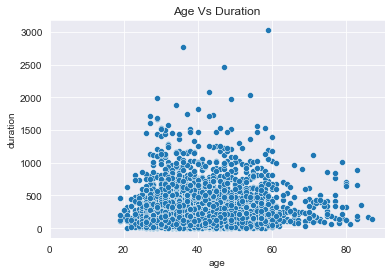

In [22]:
sns.scatterplot(data=df,x="age",y="duration")
plt.title("Age Vs Duration")
plt.xlim(0)

- There's no that strong correlation

# General Aggregations

In [23]:
# Selecting only numeric features
numeric = [feature for feature in df.columns if df[feature].dtypes != "O"]
# Perform Aggregations
df[numeric].agg([np.mean,np.median,np.std])

,age,balance,day,duration,campaign,pdays,previous
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
median,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562


- there's a lot of variety in balance 
- there's a lot of variety in age

# Density Plots

## KDEs

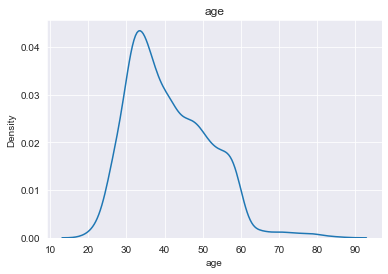

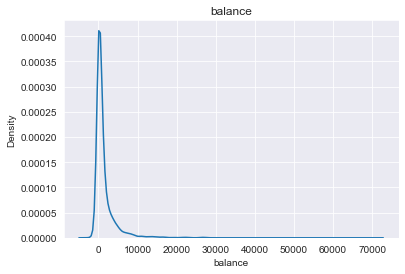

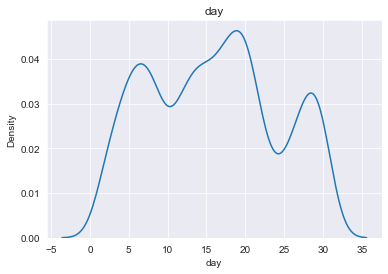

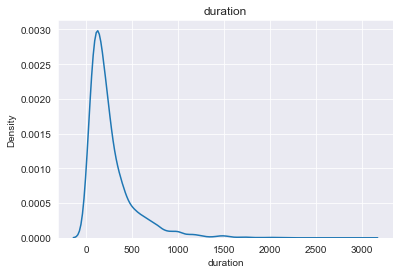

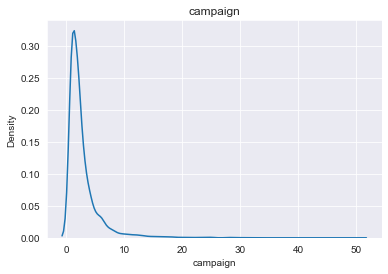

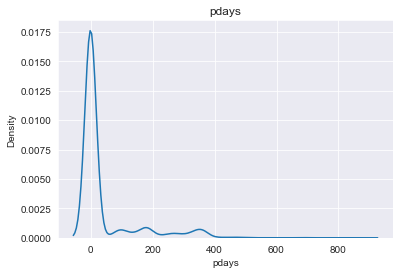

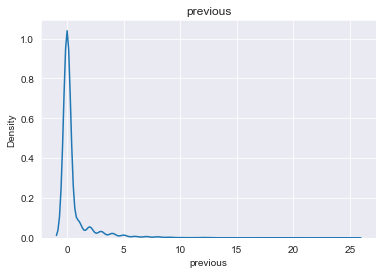

In [25]:
# Iterating throw numerical features
for feature in numeric:
    # Plotting KDEs
    sns.kdeplot(data=df,x=feature)
    plt.title(feature)
    plt.show()

- the campaign was  intense in the first half of the month

## ECDFs plots

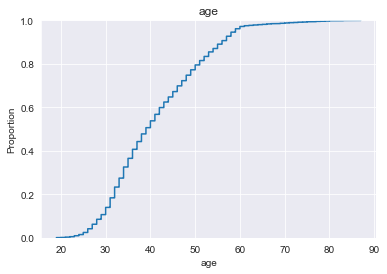

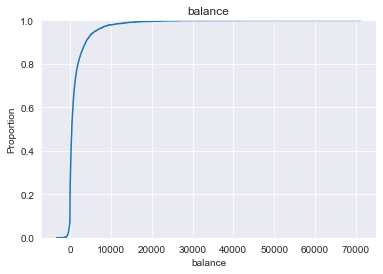

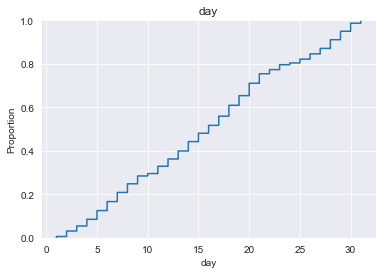

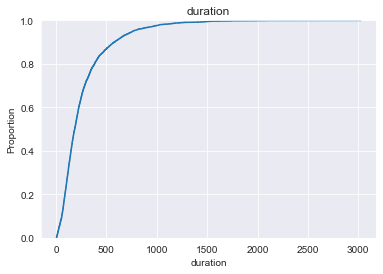

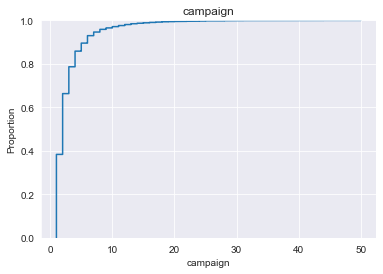

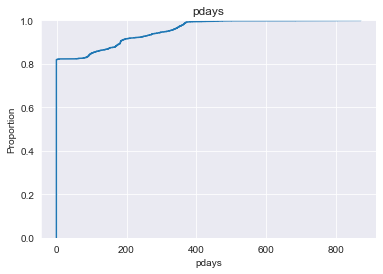

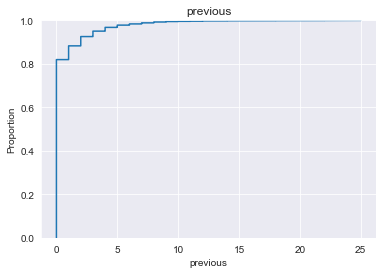

In [26]:
for feature in numeric:
    # Plotting CDFs
    sns.ecdfplot(df[feature])
    plt.title(feature)
    plt.show()

- 80 % of customers are less than 50

## Comparing balance between married and single customers.

In [5]:
df.groupby("marital_status")["balance"].mean()

marital_status
divorced    1122.390152
married     1463.195567
single      1460.414716
Name: balance, dtype: float64

- there's no signifecant difference between balance based on marital status

## Comparing education between married and single customers.

In [51]:
df.groupby("marital_status")["education"].value_counts(normalize=True)

marital_status  education
divorced        secondary    0.511364
                tertiary     0.293561
                primary      0.149621
                unknown      0.045455
married         secondary    0.510189
                tertiary     0.259921
                primary      0.188059
                unknown      0.041831
single          secondary    0.509197
                tertiary     0.391304
                primary      0.061037
                unknown      0.038462
Name: education, dtype: float64

In [12]:
df.groupby("job")["balance"].mean()

job
admin.           1226.736402
blue-collar      1085.161734
entrepreneur     1645.125000
housemaid        2083.803571
management       1766.928793
retired          2319.191304
self-employed    1392.409836
services         1103.956835
student          1543.821429
technician       1330.996094
unemployed       1089.421875
unknown          1501.710526
Name: balance, dtype: float64

In [19]:
# Previous outcome vs subsicribed
df.groupby("poutcome")["subscribed"].count().reset_index()

,poutcome,subscribed
0,failure,490
1,other,197
2,success,129
3,unknown,3705


In [17]:
# comparing duration between contacts types
df.groupby("contact_type")["duration"].mean()

contact_type
cellular     267.112569
telephone    243.355482
unknown      261.753021
Name: duration, dtype: float64

- there's no significant difference

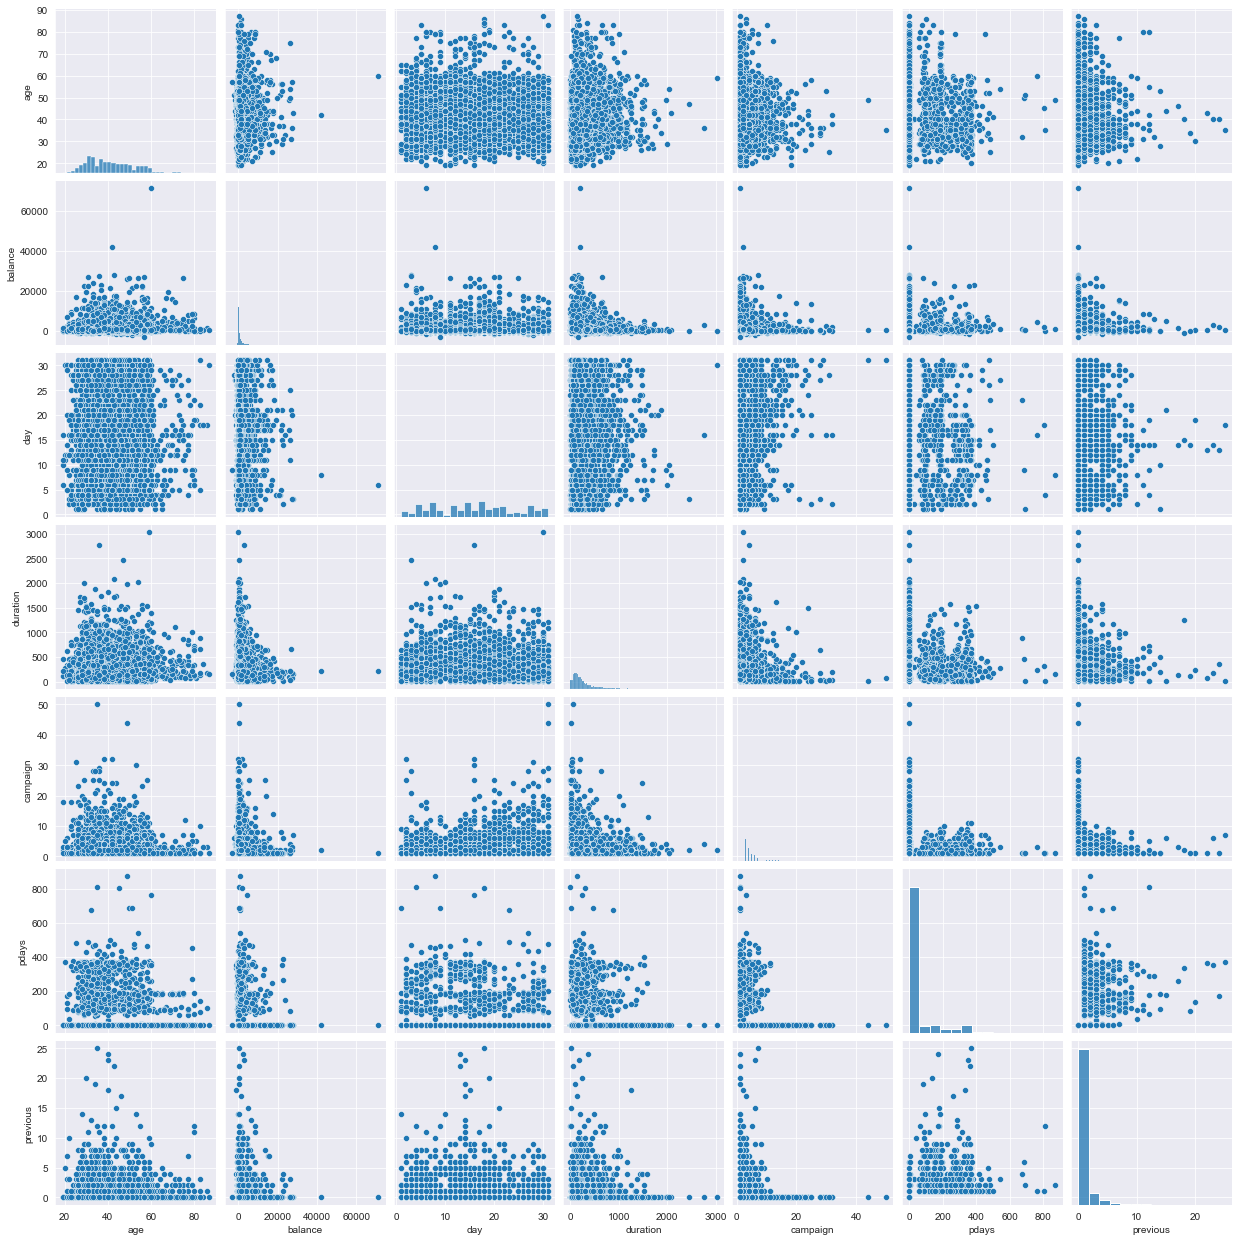

In [25]:
# Plotting Pairplots

sns.pairplot(df)

there's no strong correlations between variables.

# Visualizations

<AxesSubplot:xlabel='marital_status', ylabel='duration'>

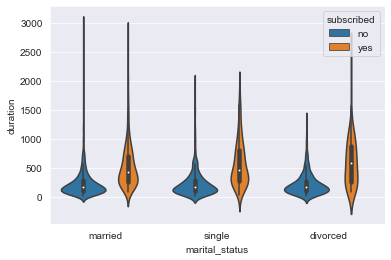

In [26]:
sns.violinplot(data=df,x="marital_status",y="duration",hue="subscribed")

-  the duration was roughly the same for all
- the single customers took more time to be convinced

<AxesSubplot:xlabel='education', ylabel='duration'>

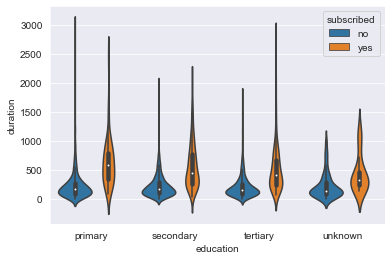

In [27]:
sns.violinplot(data=df,x="education",y="duration",hue="subscribed")

In [ ]:
- the primary educated customers took rhe longest duration to be subscribed

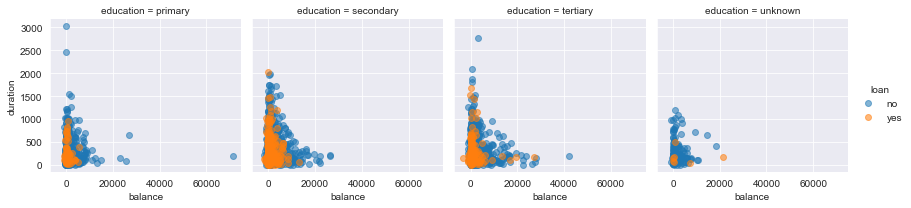

In [28]:
f =sns.FacetGrid(df,col="education",hue="loan")
f.map(plt.scatter,"balance","duration",alpha=0.55)
f.add_legend()

- Customers with secondary education are the most who have loans and took the longest duration to be convinced

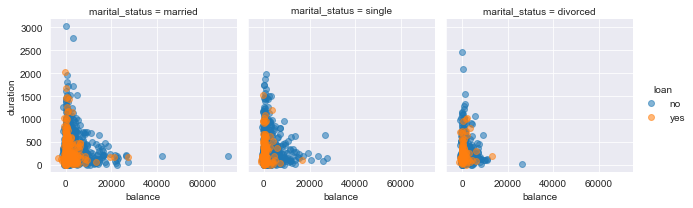

In [29]:
f =sns.FacetGrid(df,col="marital_status",hue="loan")
f.map(plt.scatter,"balance","duration",alpha=0.55)
f.add_legend()

- married customers are more likely to have a loan.

# Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


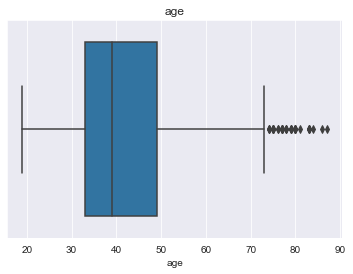

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


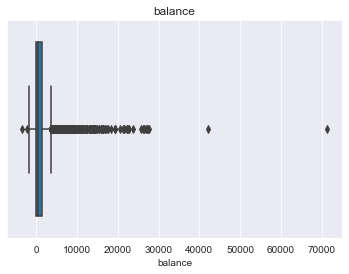

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


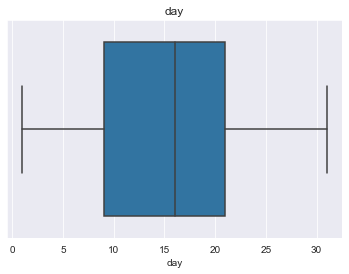

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


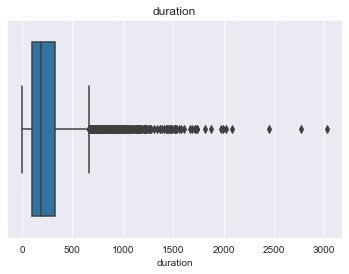

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


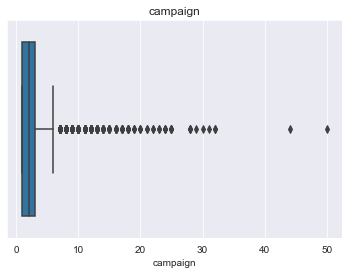

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


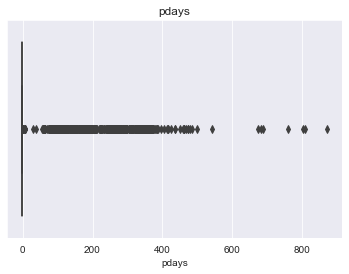

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


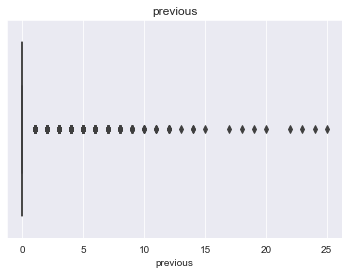

In [30]:
for feature in df.columns:
    if df[feature].dtypes != "O":
        # Plotting box-plots
        sns.boxplot(feature,data=df)
        plt.title(feature)
        plt.show()

## Break outliers with duration

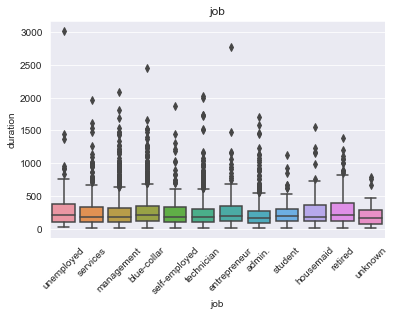

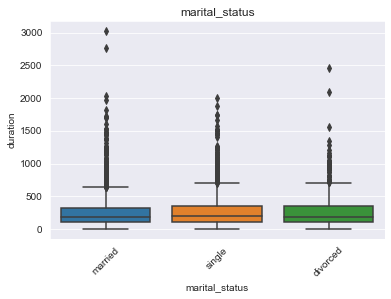

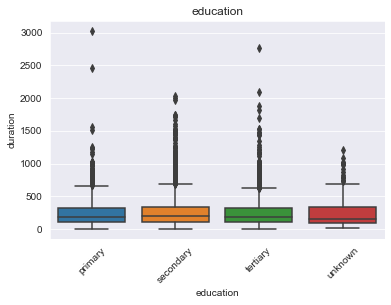

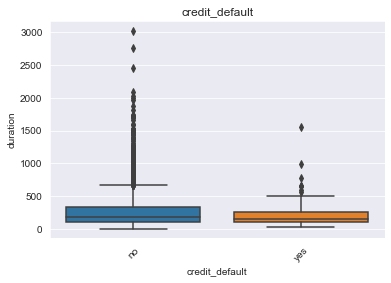

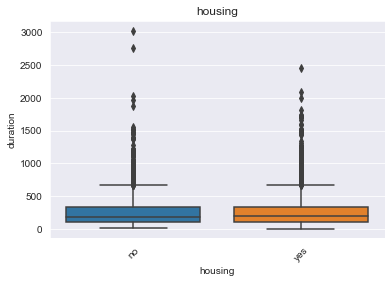

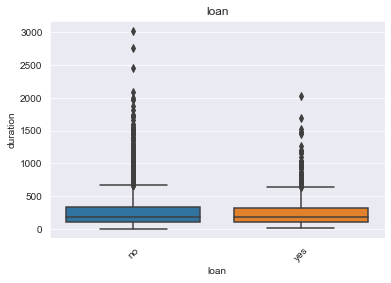

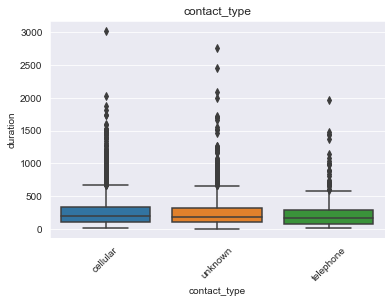

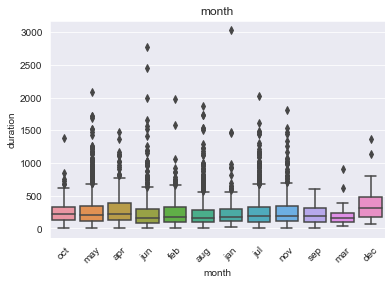

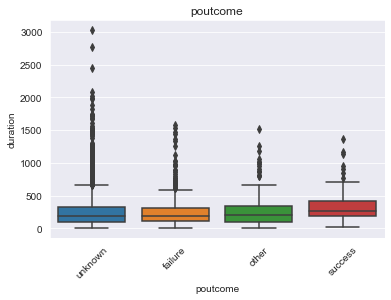

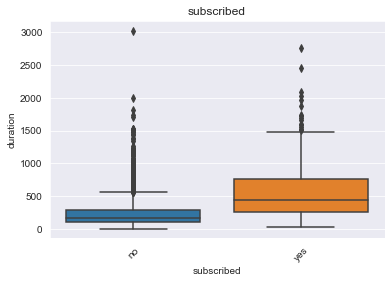

In [31]:
for feature in df.columns:
    if df[feature].dtypes == "O":
        
        sns.boxplot(x=feature,y="duration",data=df)
        plt.title(feature)
        plt.xticks(rotation=45)
        plt.show()

- unemployed customers tend to have the longest duration on the call
- primary educated customers tend to have the longest duration on the call
- customers who called with telephone spend with little than who called with cellular
- cutomers who has previous success outcome dont need a lot of duration to be subscribed

## Skewness

In [32]:
df.skew()

C:\Users\asus\AppData\Local\Temp/ipykernel_744/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

- campaign, balance and previous columns are skewed

# The End, Thank You